In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
data = pd.read_excel('data.xlsx')
data.head()

,Unnamed: 0,PRODUCT,NOART,QTY,ENROUTE,MODE,AV3MT01,AV6MT01,POSPRO,Month,Sale,filename,LABO,Frequency,Product Type,Comments
0,43,BIPRETERAX 5MG/1.25MG TABS 30,86380,777,3500,2,535.0,546,0,2016-02-01,360,2016-02-24,139661,43,Anti-hypertensive,Available
1,44,BIPRETERAX 5MG/1.25MG TABS 30,86380,777,3500,2,535.0,546,0,2016-01-01,674,2016-02-24,139661,43,Anti-hypertensive,Available
2,45,BIPRETERAX 5MG/1.25MG TABS 30,86380,310,3500,2,499.0,507,0,2015-10-01,478,2016-03-29,139661,43,Anti-hypertensive,Available
3,46,BIPRETERAX 5MG/1.25MG TABS 30,86380,310,3500,2,499.0,507,0,2015-09-01,549,2016-03-29,139661,43,Anti-hypertensive,Available
4,47,BIPRETERAX 5MG/1.25MG TABS 30,86380,0,3450,7,453.0,494,0,2015-11-01,515,2016-05-26,139661,43,Anti-hypertensive,Available


In [3]:
data.describe()

,Unnamed: 0,NOART,QTY,ENROUTE,MODE,AV3MT01,AV6MT01,POSPRO,Sale,LABO,Frequency
count,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000
mean,7501.217063,75872.510556,2507.298968,2944.602619,4.690952,1011.355661,988.830952,0.188571,995.606032,157029.905476,38.960952
std,3978.196876,73470.189098,11054.985280,12267.930321,2.167239,2457.935833,1882.145724,0.645520,3794.146191,80382.768508,4.722868
min,43.000000,701.000000,0.000000,0.000000,0.000000,-32.000000,-30.000000,0.000000,-2285.000000,16761.000000,32.000000
25%,4131.750000,43855.000000,125.750000,0.000000,3.000000,206.750000,221.000000,0.000000,143.000000,89984.000000,37.000000
50%,7589.500000,78796.000000,686.000000,0.000000,3.000000,432.000000,437.000000,0.000000,390.000000,139661.000000,37.000000
75%,10848.250000,101950.000000,2159.000000,2000.000000,7.000000,975.000000,1009.000000,0.000000,939.000000,224331.000000,37.000000
max,14335.000000,770515.000000,349613.000000,400000.000000,7.000000,64383.000000,32192.000000,3.000000,193149.000000,395010.000000,70.000000


### Explore the Dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    12600 non-null  int64         
 1   PRODUCT       12600 non-null  object        
 2   NOART         12600 non-null  int64         
 3   QTY           12600 non-null  int64         
 4   ENROUTE       12600 non-null  int64         
 5   MODE          12600 non-null  int64         
 6   AV3MT01       12600 non-null  float64       
 7   AV6MT01       12600 non-null  int64         
 8   POSPRO        12600 non-null  int64         
 9   Month         12600 non-null  datetime64[ns]
 10  Sale          12600 non-null  int64         
 11  filename      12600 non-null  datetime64[ns]
 12  LABO          12600 non-null  int64         
 13  Frequency     12600 non-null  int64         
 14  Product Type  12600 non-null  object        
 15  Comments      12600 non-null  object

In [13]:
sales=data['Sale']

mean_sale = sales.mean()
median_sale = sales.median()
mode_sale = sales.mode()

print('mean sale {} median sale {} mode sale {} '.format(mean_sale, median_sale, mode_sale))

mean sale 995.6060317460317 median sale 390.0 mode sale 0    0
dtype: int64 


In [14]:
new_data = data.pivot_table(index='Month', columns='PRODUCT', values='Sale')
new_data.columns.name = None
new_data.head()

,ACTAL TUMS BLISTER 100'S,ACTIFED DRY COUGH & COLD 100ML,ACTIFED WET COUGH & COLD 100ML,ACULAR 0.5% EYE DROPS 5ML C,ADACEL POLIO 1SSA +2NEEDLES A,ADIDAS DEEP EN DEO 150 FCA5424,ADIDAS DYN PUL DEO 150 FCA5421,ADIDAS ICE DIV DEO 150 FCA5420,ALBEN TABS 400MG 1'S,ALBENDOL 200MG TABS 2'S,...,ZESTORETIC TABS 20MG 28'S,ZINNAT SUSP 125MG/5ML 100ML,ZINNAT SUSP 125MG/5ML 50ML,ZINNAT SUSP 250MG/5ML 50ML,ZINNAT TABS 250MG 10'S,ZINNAT TABS 500MG 10'S,ZITHROMAX 500MG TABS 3'S,ZITHROMAX POS 200MG/5ML 15ML,ZITHROMAX POS 200MG/5ML 30ML,ZYRTEC 1MG/ML FL/75ML
Month,,,,,,,,,,,,,,,,,,,,,
2015-06-01,100.0,1344.0,745.0,214.0,172.0,0.0,0.0,1813.0,798.0,25.0,...,12.0,502.0,598.0,308.0,173.0,1089.0,5306.0,1294.0,325.0,1920.0
2015-07-01,936.0,6064.0,1881.0,128.0,183.0,1260.0,1469.0,1543.0,1043.0,0.0,...,19.0,371.0,508.0,409.0,158.0,795.0,4137.0,1626.0,581.0,1279.0
2015-08-01,112.0,1666.0,1072.0,259.0,145.0,910.0,1099.0,953.0,1699.0,14.0,...,40.0,1000.0,471.0,164.0,211.0,635.0,6644.0,1805.0,147.0,1683.0
2015-09-01,126.0,695.0,861.0,264.0,114.0,5147.0,5779.0,6859.0,964.0,180264.0,...,14.0,809.0,366.0,141.0,124.0,588.0,3684.0,1538.0,0.0,903.0
2015-10-01,113.0,1869.0,1061.0,210.0,173.0,0.0,0.0,0.0,839.0,2220.0,...,27.0,419.0,454.0,316.0,154.0,801.0,759.0,0.0,167.0,1542.0


In [19]:
def describe_stat():
    for name in new_data.columns:
        sales=new_data[name]

        mean_sale = sales.mean()
        median_sale = sales.median()
        mode_sale = sales.mode()

        print('{} statistics: mean sale {} median sale {} mode sale {} '.format(name, mean_sale, median_sale, mode_sale))

In [20]:
describe_stat()

ACTAL TUMS BLISTER 100'S statistics: mean sale 183.27027027027026 median sale 166.0 mode sale 0    103.0
1    189.0
2    221.0
dtype: float64 
ACTIFED DRY COUGH & COLD 100ML statistics: mean sale 825.5135135135135 median sale 644.0 mode sale 0    0.0
dtype: float64 
ACTIFED WET COUGH & COLD 100ML statistics: mean sale 479.64864864864865 median sale 355.0 mode sale 0      0.0
1    355.0
dtype: float64 
ACULAR 0.5% EYE DROPS 5ML C statistics: mean sale 310.56756756756755 median sale 252.0 mode sale 0    128.0
1    259.0
dtype: float64 
ADACEL POLIO 1SSA +2NEEDLES  A statistics: mean sale 293.1081081081081 median sale 275.0 mode sale 0    0.0
dtype: float64 
ADIDAS DEEP EN DEO 150 FCA5424 statistics: mean sale 197.75675675675674 median sale 0.0 mode sale 0    0.0
dtype: float64 
ADIDAS DYN PUL DEO 150 FCA5421 statistics: mean sale 225.51351351351352 median sale 0.0 mode sale 0    0.0
dtype: float64 
ADIDAS ICE DIV DEO 150 FCA5420 statistics: mean sale 301.5405405405405 median sale 0.0 mod

dtype: float64 
PARA DENK 125MG SUPPOS 10'S statistics: mean sale 414.5405405405405 median sale 334.0 mode sale 0       19.0
1      100.0
2      109.0
3      142.0
4      156.0
5      159.0
6      164.0
7      166.0
8      179.0
9      213.0
10     232.0
11     249.0
12     252.0
13     276.0
14     283.0
15     306.0
16     307.0
17     323.0
18     334.0
19     349.0
20     362.0
21     367.0
22     376.0
23     403.0
24     437.0
25     530.0
26     549.0
27     568.0
28     619.0
29     693.0
30     730.0
31     736.0
32     882.0
33     897.0
34     915.0
35     941.0
36    1015.0
dtype: float64 
PARA DENK 250MG SUPPOS 10'S statistics: mean sale 345.97297297297297 median sale 228.0 mode sale 0     77.0
1    408.0
dtype: float64 
PARIET 20MG TABS 28'S statistics: mean sale 514.7027027027027 median sale 479.0 mode sale 0        5.0
1      121.0
2      173.0
3      223.0
4      247.0
5      292.0
6      296.0
7      346.0
8      347.0
9      357.0
10     368.0
11     370.0
12     376

### Build Model Test

In [28]:
import statsmodels.api as sm
import matplotlib
import itertools

In [21]:
date = new_data.index.values

In [35]:
new_data["ACTAL TUMS BLISTER 100'S"].resample('MS').mean()

Month
2015-06-01    100.0
2015-07-01    936.0
2015-08-01    112.0
2015-09-01    126.0
2015-10-01    113.0
2015-11-01    127.0
2015-12-01    103.0
2016-01-01      1.0
2016-02-01    105.0
2016-03-01     95.0
2016-04-01      0.0
2016-05-01      4.0
2016-06-01    245.0
2016-07-01    160.0
2016-08-01    185.0
2016-09-01    182.0
2016-10-01    154.0
2016-11-01    197.0
2016-12-01    202.0
2017-01-01    334.0
2017-02-01    221.0
2017-03-01    320.0
2017-04-01    199.0
2017-05-01    338.0
2017-06-01    198.0
2017-07-01    174.0
2017-08-01    170.0
2017-09-01    279.0
2017-10-01    189.0
2017-11-01    221.0
2017-12-01    134.0
2018-01-01    189.0
2018-02-01    103.0
2018-03-01    166.0
2018-04-01    138.0
2018-05-01    152.0
2018-06-01    109.0
Freq: MS, Name: ACTAL TUMS BLISTER 100'S, dtype: float64

In [29]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [61]:
param_search = {}
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(new_data["ACTAL TUMS BLISTER 100'S"].resample('MS').mean(),
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
#             param_search['ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal)] = results.aic
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            key = 'ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic)
            param_search[key] = results.aic
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:498.24650968039987
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:327.1775522413988
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:144.9087297584798
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:329.7372779850015
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:nan


C:\Users\intel\anaconda\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\intel\anaconda\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:155.67474411873255
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:146.775974474211
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:447.34515678225085
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2036.4452306050014
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:295.92943439467734
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:126.87706227528815
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:325.6221981297825
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:291.15300132605233
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:151.5390797991464
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:128.78004470861555
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:457.4754627890989
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:266.4273651912378
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:314.50973206062025
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:128.86008239736736
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:280.9320059507886
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:267.1009229622221
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:139.38127572826343
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:130.80966768512624


C:\Users\intel\anaconda\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:601.9771880079875
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:328.86614442770576
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:139.88832143488565
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:281.57870949118524
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:278.29217748623194
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:139.8887290127047


C:\Users\intel\anaconda\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\intel\anaconda\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:141.90727128471178
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:440.28575527597513
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1787.025539797809
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:294.5821621789837
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:129.82259958260545
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:270.36317640920095
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:262.36457871605387
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:142.278522129628
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:127.15274435635527
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:437.2013611332423
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:251.59307866780463
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:302.0511433160039
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:129.6860258134541
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:253.54751353908466
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:250.65003376325578
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:129.68585862922058
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:131.74721619017373
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:400.1970256896882


In [65]:
key_max = max(param_search.keys(), key=(lambda k: param_search[k]))
key_min = min(param_search.keys(), key=(lambda k: param_search[k]))

print('Maximum Value: ',param_search[key_max])
print('Minimum Value: ',param_search[key_min])

Maximum Value:  2036.4452306050014
Minimum Value:  112.60690871626392


In [90]:
# key_min[6:13]
orders = tuple(map(int, key_min[6:13].split(', ')))
# key_min[16:27]
season = tuple(map(int, key_min[16:27].split(', ')))

In [91]:
mod = sm.tsa.statespace.SARIMAX(new_data["ACTAL TUMS BLISTER 100'S"].resample('MS').mean(),
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5408      0.442     -1.223      0.221      -1.408       0.326
ma.L1          1.0000      1.106      0.904      0.366      -1.168       3.168
ar.S.L12      -0.3239      0.109     -2.972      0.003      -0.538      -0.110
ma.S.L12      -0.4586      0.902     -0.508      0.611      -2.226       1.309
sigma2      1217.0371      0.001   1.34e+06      0.000    1217.035    1217.039


ValueError: operands could not be broadcast together with shapes (9,) (8,) (9,) 

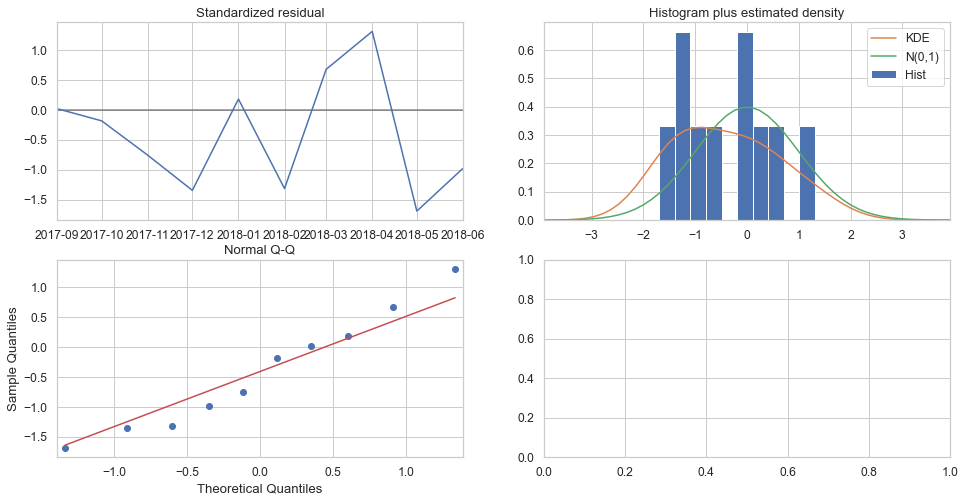

In [34]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

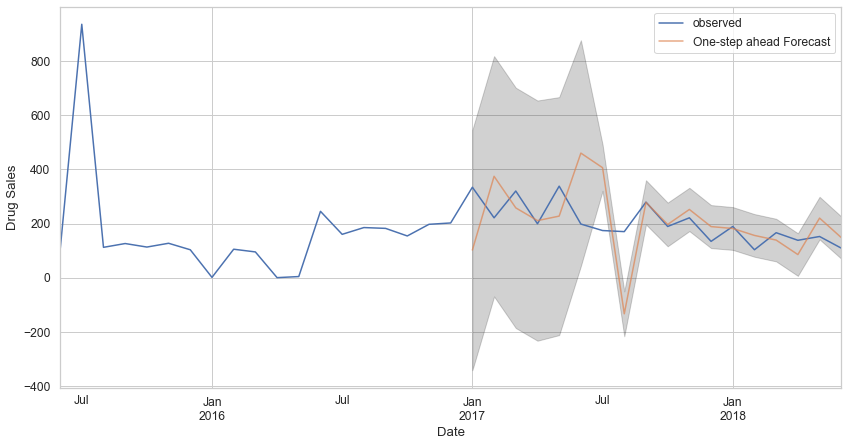

In [36]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
y=new_data["ACTAL TUMS BLISTER 100'S"].resample('MS').mean()
ax = y['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Drug Sales')
plt.legend()
plt.show()


In [37]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 18046.67


In [38]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 134.34


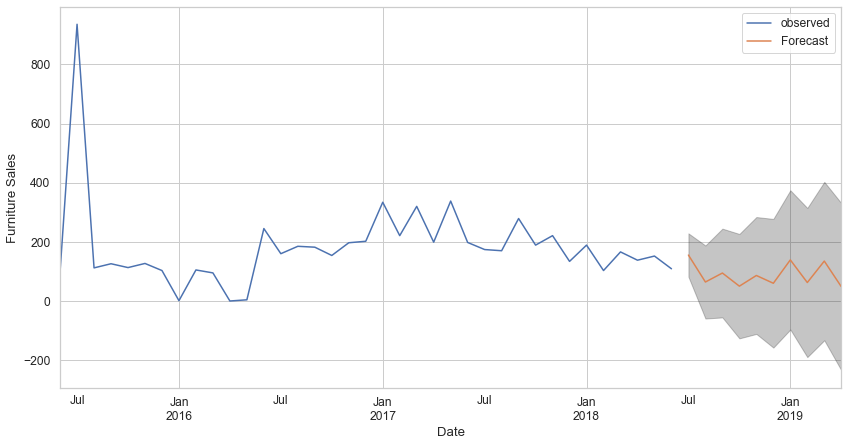

In [41]:

pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()